<a href="https://colab.research.google.com/github/kimdahyeon977/HowToSolveInbalance/blob/main/credit_card_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME ='kaggle'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/kaggle


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('creditcard.csv')
data.head(10)
#데이터의 형태를 보니 열은 변수, 행은 한 사람에 대한 데이터인 것 같다. 그리고 class가 우리가 예측해야 할 target이라고 할 수 있다. 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
for col in data.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msperc)
  #일반적으로 30%이상이 결측값이면 아예 해당 칼럼을 제거합니다.

column:       Time	 Percent of NaN value: 0.00%
column:         V1	 Percent of NaN value: 0.00%
column:         V2	 Percent of NaN value: 0.00%
column:         V3	 Percent of NaN value: 0.00%
column:         V4	 Percent of NaN value: 0.00%
column:         V5	 Percent of NaN value: 0.00%
column:         V6	 Percent of NaN value: 0.00%
column:         V7	 Percent of NaN value: 0.00%
column:         V8	 Percent of NaN value: 0.00%
column:         V9	 Percent of NaN value: 0.00%
column:        V10	 Percent of NaN value: 0.00%
column:        V11	 Percent of NaN value: 0.00%
column:        V12	 Percent of NaN value: 0.00%
column:        V13	 Percent of NaN value: 0.00%
column:        V14	 Percent of NaN value: 0.00%
column:        V15	 Percent of NaN value: 0.00%
column:        V16	 Percent of NaN value: 0.00%
column:        V17	 Percent of NaN value: 0.00%
column:        V18	 Percent of NaN value: 0.00%
column:        V19	 Percent of NaN value: 0.00%
column:        V20	 Percent of NaN value

#데이터 탐색 결과 : feature가 모두 수치형이고 lable은 범주형인 데이터이다. 또한 데이터 타입도 모두 올바르게 되어있다. 결측값 또한 없다.

#EDA및 데이터 인사이트 얻기

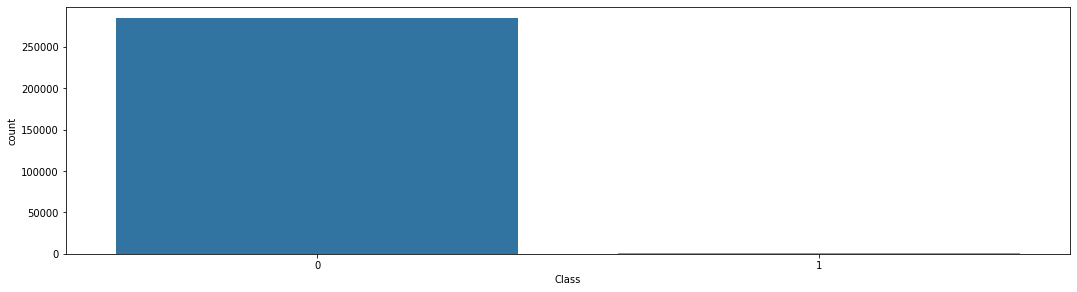

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,10))

plt.subplot(211)
sns.countplot(data = data , x = "Class")
plt.show()

엄청난 imbalance data임을 알 수 있다.
변수의 뜻을 알 수 있는데 Class와 Amount밖에 없으니 Amount도 EDA해보자

In [7]:
amount_true = data[data['Class'] == 0]['Amount']
amount_false = data[data['Class'] == 1]['Amount']

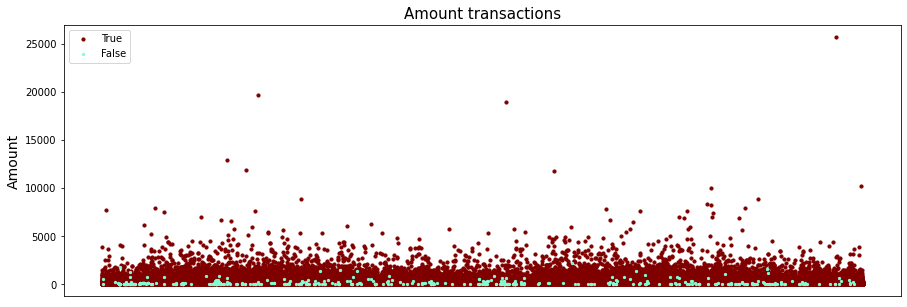

In [8]:
plt.figure(figsize=(15, 5));
plt.scatter(y=amount_true.values, x=amount_true.index, color='maroon', s = 10, label ='True');
plt.scatter(y=amount_false.values, x=amount_false.index , color='aquamarine' , s = 5, label ='False');
plt.title('Amount transactions', fontsize =15);
plt.ylabel('Amount', fontsize=14);
plt.xticks([])
plt.legend();
plt.show();
#예상대로 신용불량자들은 Amount transactions가 적음을 알 수 있다.

다른 변수들은 의미는 알 수 없지만 EDA를 해보자

Index(['Class', 'V11', 'V4', 'V2', 'V21', 'V19', 'V20'], dtype='object')


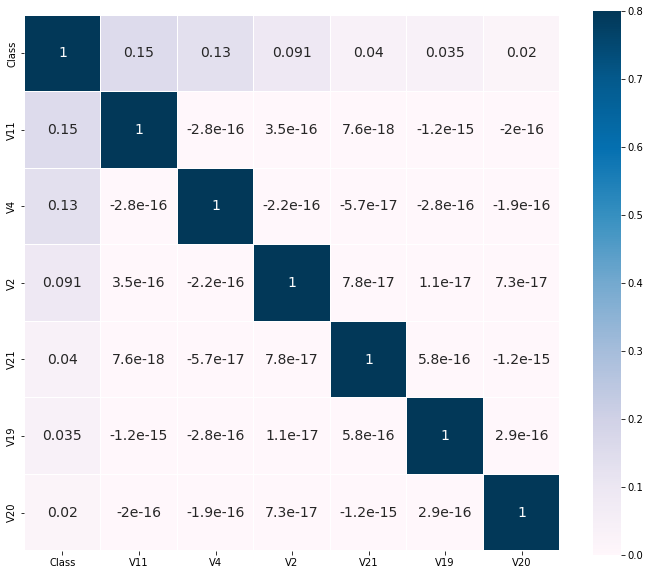

In [9]:
#Zoomed Heat Map
k= 7
colormap = plt.cm.PuBu
cols = data.corr().nlargest(k,'Class')['Class'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)

#딱히 유의미한 변수가 없는 것 같으므로 파생변수를 만들어 주자


In [10]:
data['day']= data['Time'] // 3600 
data['month'] = data['day'] // 30
data['week'] = (data['day'] - data['month'] * 30) // 7
data.shape

(284807, 34)

In [11]:
data[['day','month', 'week']]  = data[['day','month', 'week']].astype('str')
data = pd.get_dummies(data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


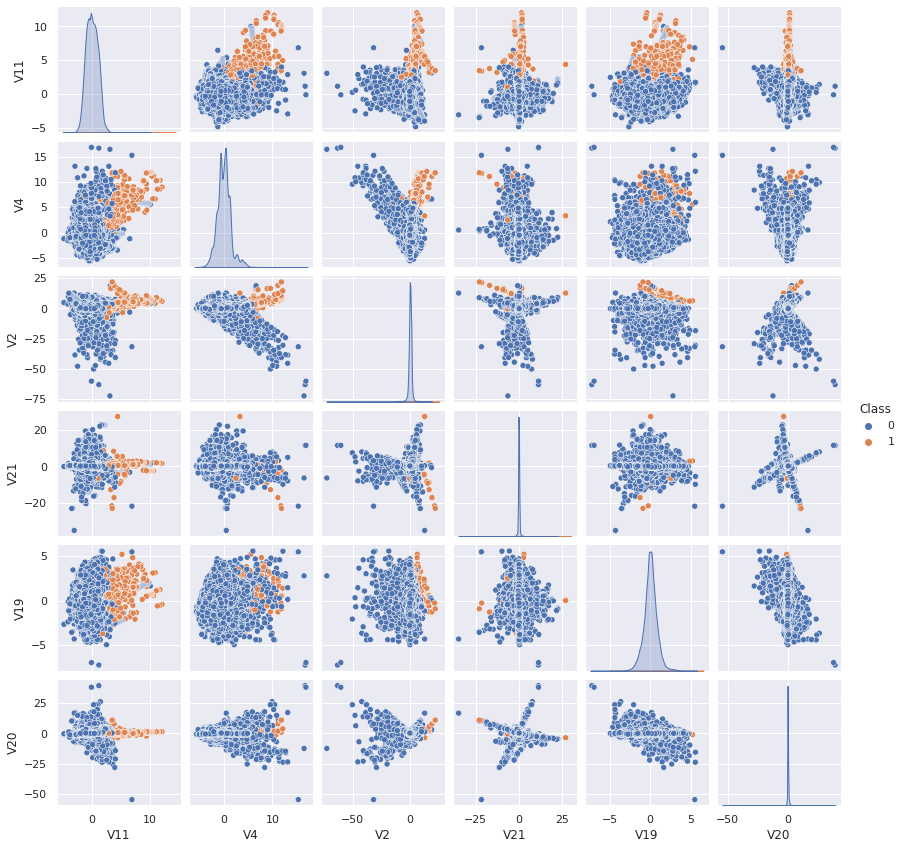

In [12]:
sns.set()
sns.pairplot(data[['Class', 'V11', 'V4', 'V2', 'V21', 'V19', 'V20']],size = 2 ,kind ='scatter',diag_kind='kde',hue='Class')
plt.show()

< imbalance data를 해결하는 방법 >

1. oversampling 장점 : under-sampling보다 성능이 뛰어나다. 단점 : minor class를 판별시 과적합 될 가능성이 있다.

2. undersampling 장점 : 모델이 빨리 돌아간다. 단점 : 과적합

3. SMOTE : 주변에 있는 데이터셋의 특징과 유사하게 데이터를 생성한다. 장점 : 데이터 손실을 하지 않으면서 과적합을 피할 수 있다. 단점 : 고차원 데이터에 효율적이지 않다.


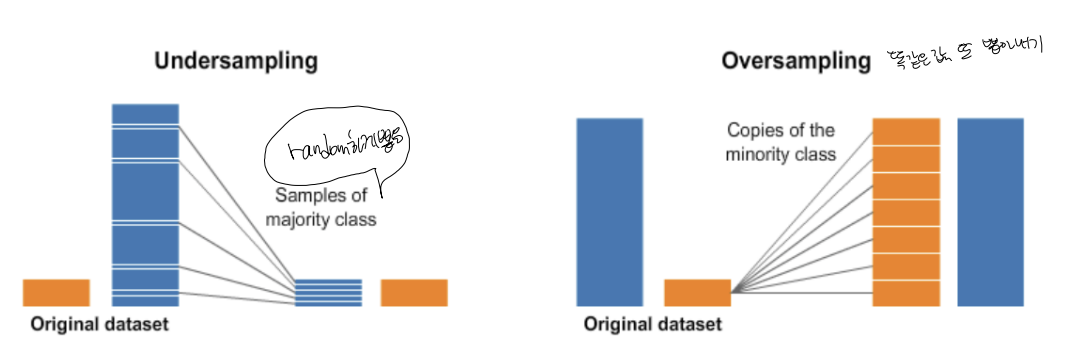

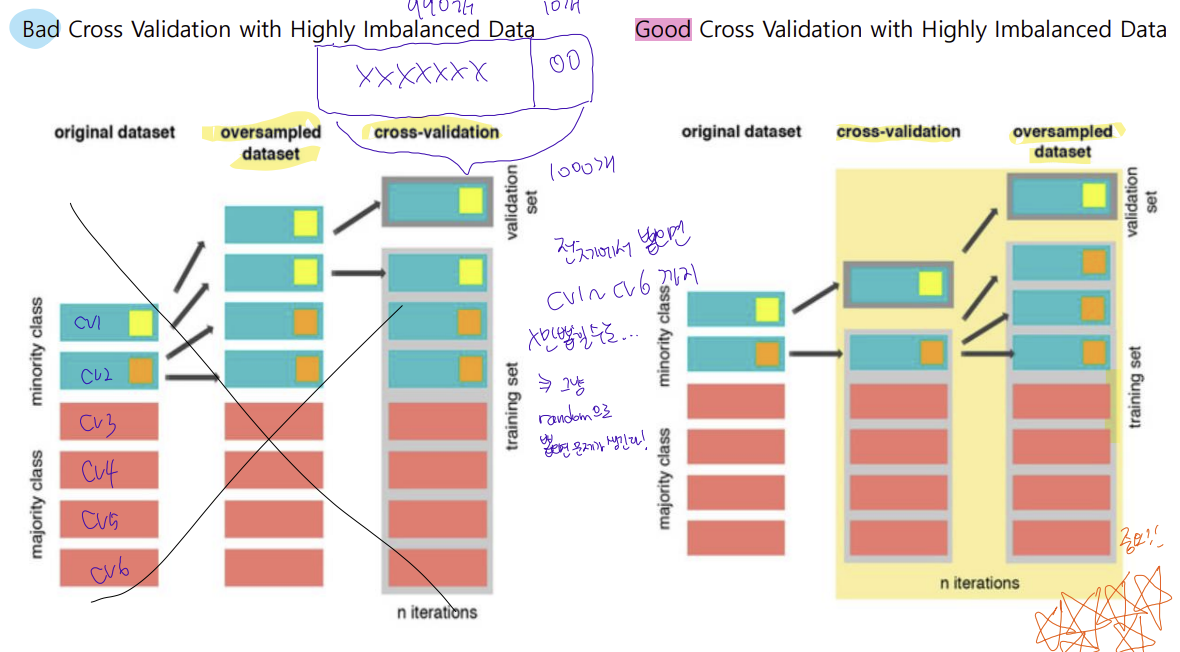

#Modeling : Convolutional Neural Network

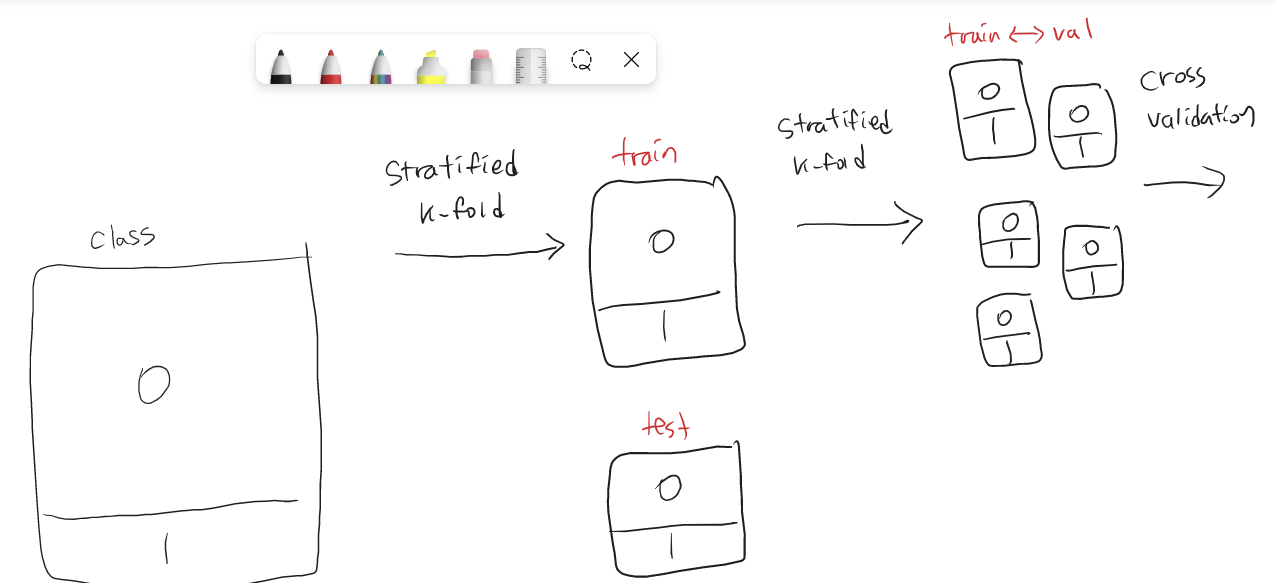

##모델링 계획 : stratified k-fold로 class균형을 유지하면서 sampling을 한다. 그 이후에 oversampling을 한다. (cross validation -> oversampling 순서를 반드시 지켜야함! )

In [13]:
y=data['Class']
X=data.drop(['Class'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#모든 피처가 정규분포를 따르게 된다.

In [14]:
import collections
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index  in skf.split(X, y):
    #print(train_index)
    X_train, X_test = X[train_index], X[test_index]
    #print(train_index)
    #print('='*10)
    Y_train, Y_test = y[train_index], y[test_index]

###그리고 oversampling을 다소 해결해주는 ensemble classifier 모델링을 사용하였다.

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=10)

In [16]:
from sklearn.metrics import accuracy_score
# 모델설정
cv_accuracy = []
n_iter =0
i=iter(skf.split(X_train, Y_train))
train_1, val_1 = next(i)
train_2, val_2 = next(i)
train_3, val_3 = next(i)
train_4, val_4 = next(i)
train_5, val_5 = next(i)
# train데이터를 넣어 복제함

for j in range(1,6):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
    
    x_train, x_test = X_train[globals()['train_{}'.format(j)]], X_train[globals()['val_{}'.format(j)]]
    y_train, y_test = Y_train.iloc[globals()['train_{}'.format(j)]], Y_train.iloc[globals()['val_{}'.format(j)]]
    
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 소수점 4자리 반올림
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.3226,  학습 데이터 크기 : 182276,  검증 데이터 크기 : 45570
#1 검증 세트 인덱스 : [212516 212644 213092 ... 284804 284805 284806]

#2 교차 검증 정확도 : 0.3339,  학습 데이터 크기 : 182277,  검증 데이터 크기 : 45569
#2 검증 세트 인덱스 : [212516 212644 213092 ... 284804 284805 284806]

#3 교차 검증 정확도 : 0.6439,  학습 데이터 크기 : 182277,  검증 데이터 크기 : 45569
#3 검증 세트 인덱스 : [212516 212644 213092 ... 284804 284805 284806]

#4 교차 검증 정확도 : 0.9992,  학습 데이터 크기 : 182277,  검증 데이터 크기 : 45569
#4 검증 세트 인덱스 : [212516 212644 213092 ... 284804 284805 284806]

#5 교차 검증 정확도 : 0.999,  학습 데이터 크기 : 182277,  검증 데이터 크기 : 45569
#5 검증 세트 인덱스 : [212516 212644 213092 ... 284804 284805 284806]

## 평균 검증 정확도: 0.65972


Confusion matrix, without normalization
[[45489     1]
 [   44    35]]
Normalized confusion matrix
[[9.99978017e-01 2.19828534e-05]
 [5.56962025e-01 4.43037975e-01]]


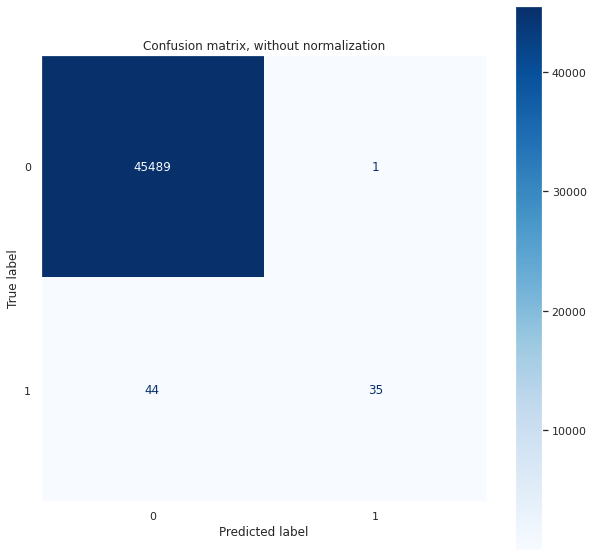

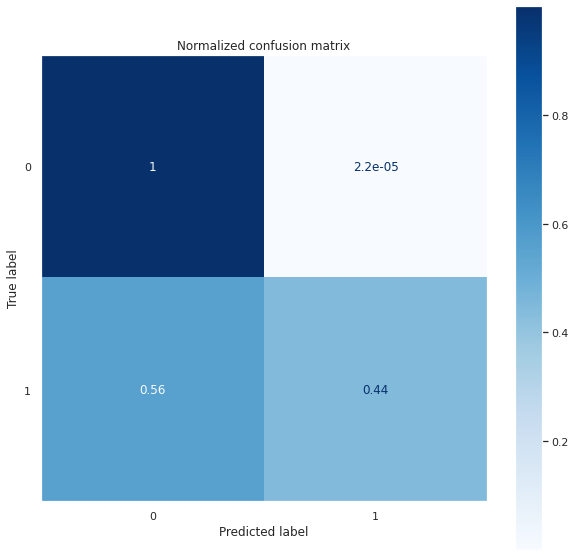

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, ConfusionMatrixDisplay
class_names = y_train.unique()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))

    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        x_test, #
        y_test, #
        display_labels=class_names, #
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)